<a href="https://colab.research.google.com/github/dev0419/Pytorch_FreeCodeCamp/blob/main/pytorch_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [126]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

In [127]:
n_samples  = 1000
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [128]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [129]:
circles = pd.DataFrame({'X1':X[:,0],
                        'X2':X[:,1],
                        'label':y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [130]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

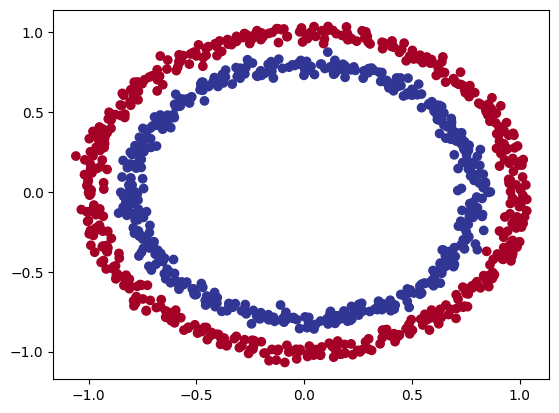

In [131]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [132]:
X.shape,y.shape

((1000, 2), (1000,))

In [133]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: 1


In [134]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [135]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

In [136]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [137]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2,out_features = 5)
    self.layer2 = nn.Linear(in_features = 5,out_features =  1)

  def forward(self,x):
    return self.layer2(self.layer1(x))

model = CircleModel().to(device)
model

CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [138]:
model = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [139]:
untrained_preds = model(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [140]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

In [141]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [142]:
y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0', grad_fn=<SliceBackward0>)

In [143]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [144]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device)[:5])))
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [145]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [146]:
torch.manual_seed(42)
epochs = 100
X_train,y_train, = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model.train()
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy = accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()

  with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69796, Accuracy: 51.88% | Test loss: 0.69363, Test acc: 56.50%
Epoch: 10 | Loss: 0.69343, Accuracy: 50.00% | Test loss: 0.69367, Test acc: 39.50%
Epoch: 20 | Loss: 0.69313, Accuracy: 51.88% | Test loss: 0.69608, Test acc: 47.00%
Epoch: 30 | Loss: 0.69305, Accuracy: 50.00% | Test loss: 0.69517, Test acc: 46.50%
Epoch: 40 | Loss: 0.69300, Accuracy: 51.62% | Test loss: 0.69441, Test acc: 47.00%
Epoch: 50 | Loss: 0.69299, Accuracy: 50.38% | Test loss: 0.69441, Test acc: 45.50%
Epoch: 60 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69478, Test acc: 46.00%
Epoch: 70 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69477, Test acc: 46.00%
Epoch: 80 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69465, Test acc: 45.50%
Epoch: 90 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69465, Test acc: 45.50%


In [147]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print("helper functions.py already skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper functions.py already skipping download


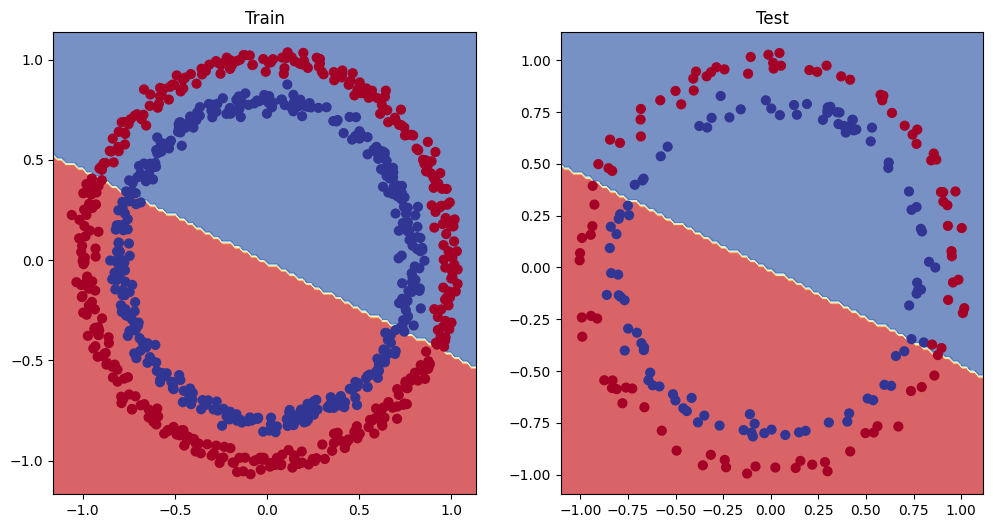

In [148]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [149]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [150]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [151]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


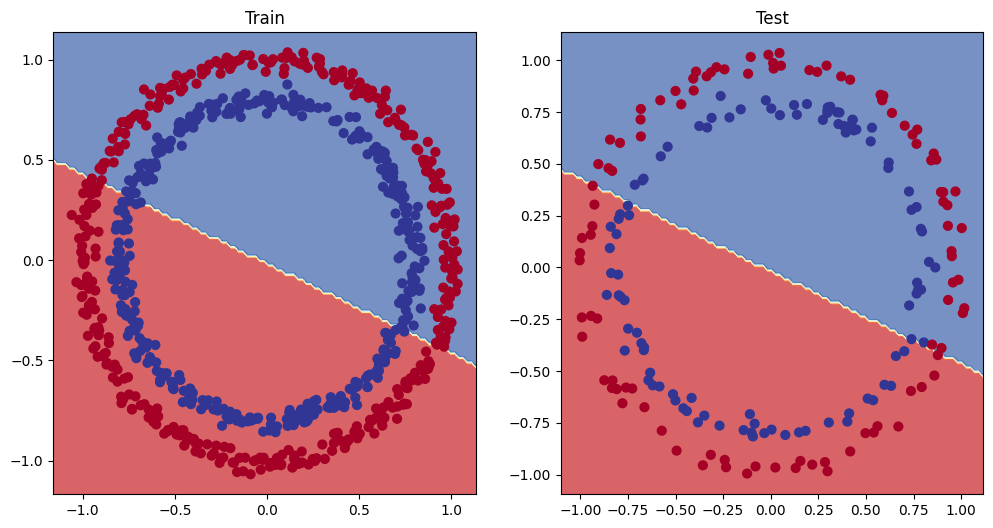

In [152]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [153]:
weight = 0.7
bias = - 0.3
start = 0
stop = 1
step = 0.01
X_regression = torch.arange(start,stop,step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[-0.3000],
         [-0.2930],
         [-0.2860],
         [-0.2790],
         [-0.2720]]))

In [154]:
train_split = int(0.8*len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]
print(len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression))

80 80 20 20


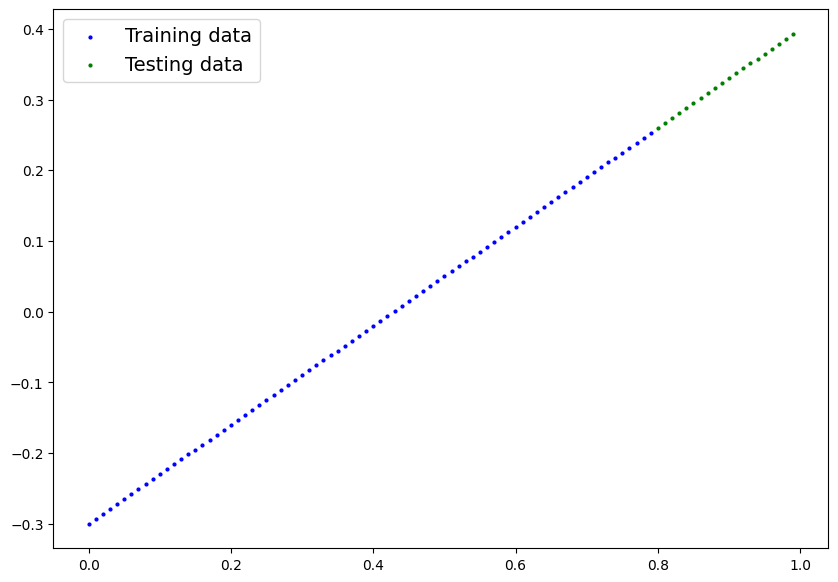

In [155]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [156]:
model_2 = nn.Sequential(nn.Linear(in_features = 1,out_features = 10),
                        nn.Linear(in_features = 10,out_features = 10),
                        nn.Linear(in_features = 10,out_features = 1))
model_2.to(device)
model_2


Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [157]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [158]:
torch.manual_seed(42)
epochs = 1000
X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()

  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 0.15986, Test loss: 0.05857
Epoch: 100 | Train loss: 0.06227, Test loss: 0.01888
Epoch: 200 | Train loss: 0.06478, Test loss: 0.03185
Epoch: 300 | Train loss: 0.05872, Test loss: 0.01583
Epoch: 400 | Train loss: 0.06592, Test loss: 0.01563
Epoch: 500 | Train loss: 0.06352, Test loss: 0.01569
Epoch: 600 | Train loss: 0.06040, Test loss: 0.01994
Epoch: 700 | Train loss: 0.06159, Test loss: 0.00819
Epoch: 800 | Train loss: 0.06075, Test loss: 0.02356
Epoch: 900 | Train loss: 0.05529, Test loss: 0.01019


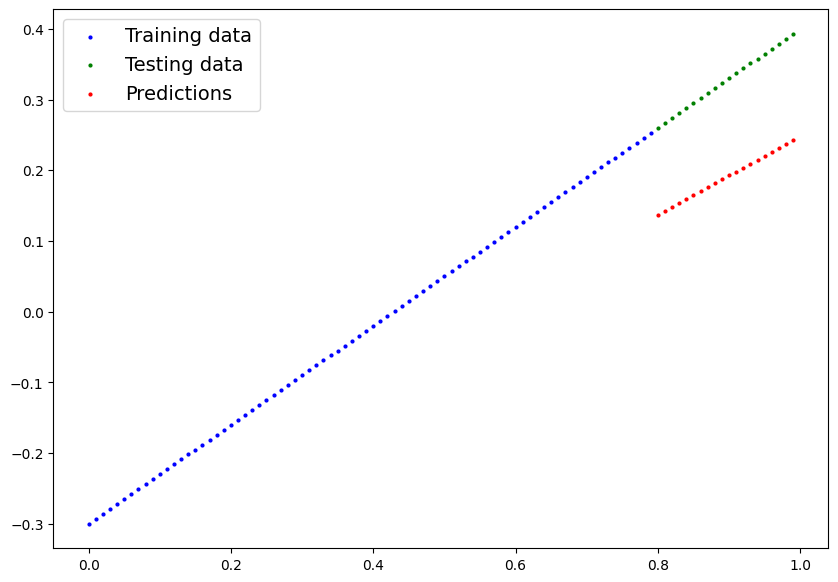

In [159]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(X_train_regression.cpu(),y_train_regression.cpu(),X_test_regression.cpu(),y_test_regression.cpu(),y_preds.cpu())

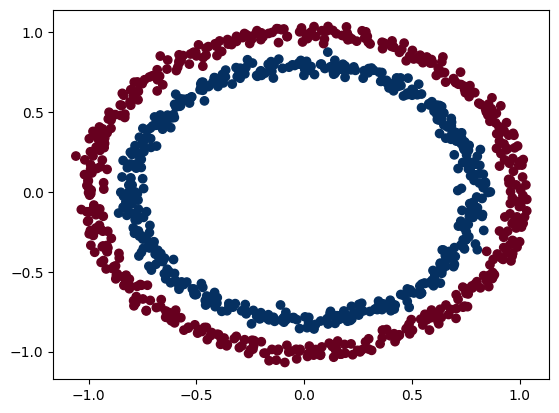

In [160]:
n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [161]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [162]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [163]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),0.1)

In [164]:
torch.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test,test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


In [165]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

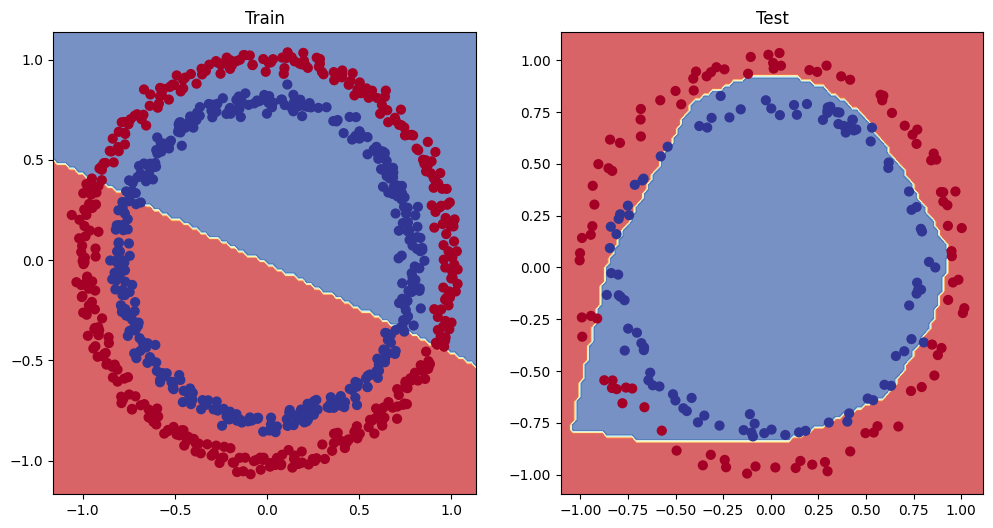

In [166]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

Multiclass classification

tensor([[ -0.8125,   2.9499,  -3.9235,   0.4983,   2.4203,  -7.0227,   1.2057,
          -5.7285,  -8.8638,   8.7016,   8.1544,   8.6664],
        [ -3.3068,  -9.2287,   4.3692,  -1.7476,  -8.9041,   0.7637,  -7.0747,
           9.2737,  -3.4399,   2.4695,  -6.1622,   2.6366],
        [ -3.4493,  10.3079,   6.0696,   2.7428,  -5.7920,  -6.1058,  -9.8006,
           7.9714,   3.2229,   5.2929,  -7.8049,  10.4607],
        [  8.5850,  -1.8714,  -8.1631,  -5.2835,  -4.5299,   1.6702,  -3.5668,
          -6.0696,   1.0732,  -7.0917,  -5.1187,  -1.6842],
        [ -2.0535,  10.0966,   4.2936,   4.1531,  -8.8875,  -5.8407,  -9.7471,
           9.9026,   5.0111,   3.0115, -10.4126,  10.6876]]) tensor([2, 3, 0, 1, 0])


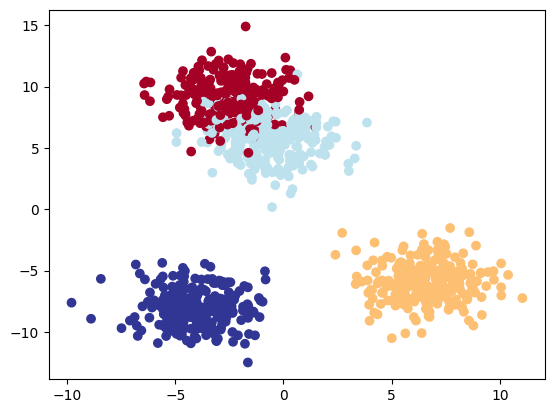

In [167]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 12
RANDOM_SEED = 42

X_blob,y_blob = make_blobs(n_samples = 1000,n_features = NUM_FEATURES,centers = NUM_CLASSES,cluster_std=1.5,random_state = RANDOM_SEED)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5],y_blob[:5])

X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state = RANDOM_SEED)
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)


In [168]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [169]:
from torch import nn
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features,out_features=hidden_units),
        nn.Linear(in_features = hidden_units,out_features=hidden_units),
        nn.Linear(in_features = hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model_4 =  BlobModel(input_features = NUM_FEATURES,
                     output_features = NUM_CLASSES,
                     hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=12, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [170]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)

In [171]:
model_4(X_blob_train.to(device))[:5]

tensor([[-3.3519e-01,  1.4950e+00,  5.5165e-01,  1.9766e+00],
        [ 1.2331e-01,  9.6051e-01,  1.1943e+00, -6.1767e-01],
        [ 7.2461e-01,  1.0450e+00,  1.5409e+00, -1.1476e+00],
        [-8.8444e-02, -3.1585e-01, -6.2458e-01,  1.7287e+00],
        [ 8.9539e-02, -1.5431e-03, -1.6235e-01,  1.4624e+00]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [172]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [173]:
y_logits =  model_4(X_blob_test.to(device))
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.4876,  1.5146,  0.4329,  1.9117],
        [ 0.4463,  0.6343,  0.8665, -0.4733],
        [-0.2549,  1.0349,  0.2852,  1.7313],
        [-0.0351, -0.7860,  0.4422, -2.2948],
        [ 0.6725,  0.9262,  1.4335, -1.0568]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.0456, 0.3377, 0.1145, 0.5023],
        [0.2423, 0.2924, 0.3688, 0.0966],
        [0.0733, 0.2664, 0.1259, 0.5344],
        [0.3137, 0.1480, 0.5055, 0.0327],
        [0.2171, 0.2798, 0.4646, 0.0385]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [174]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [175]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.0456, 0.3377, 0.1145, 0.5023], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


In [176]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.72754, Acc: 0.00% | Test Loss: 0.68494, Test Acc: 93.50%
Epoch: 10 | Loss: 0.03509, Acc: 100.00% | Test Loss: 0.03263, Test Acc: 100.00%
Epoch: 20 | Loss: 0.01257, Acc: 100.00% | Test Loss: 0.01311, Test Acc: 100.00%
Epoch: 30 | Loss: 0.00722, Acc: 100.00% | Test Loss: 0.00788, Test Acc: 100.00%
Epoch: 40 | Loss: 0.00495, Acc: 100.00% | Test Loss: 0.00554, Test Acc: 100.00%
Epoch: 50 | Loss: 0.00371, Acc: 100.00% | Test Loss: 0.00423, Test Acc: 100.00%
Epoch: 60 | Loss: 0.00295, Acc: 100.00% | Test Loss: 0.00340, Test Acc: 100.00%
Epoch: 70 | Loss: 0.00243, Acc: 100.00% | Test Loss: 0.00284, Test Acc: 100.00%
Epoch: 80 | Loss: 0.00206, Acc: 100.00% | Test Loss: 0.00243, Test Acc: 100.00%
Epoch: 90 | Loss: 0.00178, Acc: 100.00% | Test Loss: 0.00212, Test Acc: 100.00%


In [177]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[12.0146, -6.0169,  0.9360,  5.3457],
        [-0.5798, -0.0689, -5.2253,  6.7700],
        [10.3975, -5.1609,  1.9074,  3.1646],
        [-8.8284,  5.2589, -5.1097, -0.8763],
        [ 0.5276, -0.4836, -4.4151,  6.4815],
        [-8.0853,  4.9172, -3.5996, -1.6294],
        [ 0.4674, -0.8274, -7.1406, 10.1947],
        [ 0.0233, -0.2439,  7.5418, -5.3683],
        [10.7659, -5.1560,  1.0133,  4.3067],
        [-7.7762,  4.6935, -4.3335, -0.7004]], device='cuda:0')

In [178]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([0, 3, 0, 1, 3, 1, 3, 2, 0, 1], device='cuda:0')
Labels: tensor([0, 3, 0, 1, 3, 1, 3, 2, 0, 1], device='cuda:0')
Test accuracy: 100.0%


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10201x2 and 12x8)

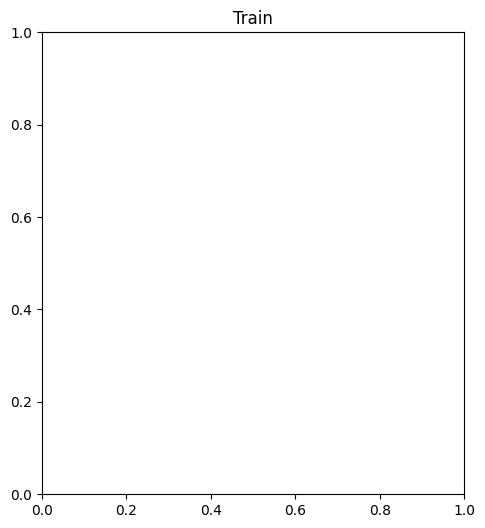

In [179]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)